In [10]:
import pandas as pd
import numpy as np

In [11]:
df=pd.read_excel("/Users/jiagu/Desktop/Cathay/SIACargoTimetable.xlsx",sheet_name="Sheet2")
df

,Carrier Code,Flight No,Origin,Destination,Validity From,Validity To,Mon,Tue,Wed,Thu,...,Load Weight,Duration2,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Duration
0,SQ,278,ADL,SIN,06-Nov-2024,05-Dec-2024,✓,✓,✓,✓,...,65,04:30:00,NaT,NaN,NaN,NaN,NaN,NaN,4.500000,4.500000
1,SQ,276,ADL,SIN,06-Nov-2024,04-Dec-2024,NaN,NaN,✓,NaN,...,65,04:20:00,NaT,NaN,NaN,NaN,NaN,NaN,4.333333,4.333333
2,SQ,7121,AKL,BNE,11-Nov-2024,11-Nov-2024,✓,NaN,NaN,NaN,...,120,00:25:00,NaT,NaN,NaN,NaN,NaN,NaN,0.416667,0.416667
3,SQ,7297,AKL,MEL,06-Nov-2024,04-Dec-2024,NaN,NaN,✓,NaN,...,120,02:05:00,NaT,NaN,NaN,NaN,NaN,NaN,2.083333,2.083333
4,SQ,7293,AKL,MEL,10-Nov-2024,01-Dec-2024,NaN,NaN,NaN,NaN,...,120,02:05:00,NaT,NaN,NaN,NaN,NaN,NaN,2.083333,2.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,TR,139,TSN,SIN,07-Nov-2024,05-Dec-2024,NaN,✓,NaN,✓,...,65,06:45:00,NaT,NaN,NaN,NaN,NaN,NaN,6.750000,6.750000
1085,TR,587,VTZ,SIN,06-Nov-2024,04-Dec-2024,✓,NaN,✓,NaN,...,18,06:40:00,1900-01-01,05:45:00,1.0,NaN,NaN,NaN,6.666667,6.666667
1086,TR,121,WUH,SIN,06-Nov-2024,04-Dec-2024,✓,NaN,✓,NaN,...,65,05:10:00,NaT,NaN,NaN,NaN,NaN,NaN,5.166667,5.166667
1087,TR,135,XIY,SIN,06-Nov-2024,05-Dec-2024,✓,✓,✓,✓,...,18,06:00:00,NaT,NaN,NaN,NaN,NaN,NaN,6.000000,6.000000


In [12]:
import pandas as pd

# 将 'Validity From' 和 'Validity To' 列转换为日期格式
df['Validity From'] = pd.to_datetime(df['Validity From'])
df['Validity To'] = pd.to_datetime(df['Validity To'])

# 定义一个函数来生成日期列表
def generate_dates(row):
    days_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    start_date = row['Validity From']
    end_date = row['Validity To']
    date_list = pd.date_range(start=start_date, end=end_date)
    selected_dates = []
    for date in date_list:
        day_name = date.strftime('%a')
        if row[day_name] == '✓':
            selected_dates.append(date)
    return selected_dates

# 应用函数到每一行
df['Selected Dates'] = df.apply(generate_dates, axis=1)

# 展示结果
df[['Carrier Code', 'Flight No', 'Origin', 'Destination', 'Selected Dates']]
# 将 'Selected Dates' 的每个日期分为多个记录
df_exploded = df.explode('Selected Dates')

# 展示结果
df_exploded[['Carrier Code', 'Flight No', 'Origin', 'Destination', 'Selected Dates']]
df_exploded[df_exploded['Flight No'] == 7952]

,Carrier Code,Flight No,Origin,Destination,Validity From,Validity To,Mon,Tue,Wed,Thu,...,Duration2,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Duration,Selected Dates
30,SQ,7952,ANC,DFW,2024-11-07,2024-12-05,NaN,NaN,NaN,✓,...,09:10:00,NaT,NaN,NaN,NaN,NaN,NaN,9.166667,9.166667,2024-11-07
30,SQ,7952,ANC,DFW,2024-11-07,2024-12-05,NaN,NaN,NaN,✓,...,09:10:00,NaT,NaN,NaN,NaN,NaN,NaN,9.166667,9.166667,2024-11-14
30,SQ,7952,ANC,DFW,2024-11-07,2024-12-05,NaN,NaN,NaN,✓,...,09:10:00,NaT,NaN,NaN,NaN,NaN,NaN,9.166667,9.166667,2024-11-21
30,SQ,7952,ANC,DFW,2024-11-07,2024-12-05,NaN,NaN,NaN,✓,...,09:10:00,NaT,NaN,NaN,NaN,NaN,NaN,9.166667,9.166667,2024-11-28
30,SQ,7952,ANC,DFW,2024-11-07,2024-12-05,NaN,NaN,NaN,✓,...,09:10:00,NaT,NaN,NaN,NaN,NaN,NaN,9.166667,9.166667,2024-12-05
155,SQ,7952,HKG,ANC,2024-11-07,2024-12-05,NaN,NaN,NaN,✓,...,1899-12-29 16:30:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-11-07
155,SQ,7952,HKG,ANC,2024-11-07,2024-12-05,NaN,NaN,NaN,✓,...,1899-12-29 16:30:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-11-14
155,SQ,7952,HKG,ANC,2024-11-07,2024-12-05,NaN,NaN,NaN,✓,...,1899-12-29 16:30:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-11-21
155,SQ,7952,HKG,ANC,2024-11-07,2024-12-05,NaN,NaN,NaN,✓,...,1899-12-29 16:30:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-11-28
155,SQ,7952,HKG,ANC,2024-11-07,2024-12-05,NaN,NaN,NaN,✓,...,1899-12-29 16:30:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-05


In [13]:
# Define the selected (origin, destination) pairs
selected_pairs = [('SIN', 'BKK'), ('SIN', 'KUL'), ('SIN', 'CGK'), ('SIN', 'HKG'), ('SIN', 'DPS')]

# Filter the dataframe for the selected pairs
filtered_df = df_exploded[df_exploded[['Origin', 'Destination']].apply(tuple, axis=1).isin(selected_pairs)]

# Group by (origin, destination) pairs and sum the load weight
load_weight_sums = filtered_df.groupby(['Origin', 'Destination'])['Duration'].mean().reset_index()

# Group by (origin, destination) pairs and 'Selected Dates', then sum the load weight
daily_load_weight_sums = filtered_df.groupby(['Origin', 'Destination', 'Selected Dates'])['Duration'].mean().reset_index()

# Filter for the selected pairs
daily_load_weight_sums = daily_load_weight_sums[daily_load_weight_sums[['Origin', 'Destination']].apply(tuple, axis=1).isin(selected_pairs)]

# Display the result
daily_load_weight_sums

,Origin,Destination,Selected Dates,Duration
0,SIN,BKK,2024-11-06,2.545455
1,SIN,BKK,2024-11-07,2.541667
2,SIN,BKK,2024-11-08,2.545455
3,SIN,BKK,2024-11-09,2.541667
4,SIN,BKK,2024-11-10,2.534722
...,...,...,...,...
145,SIN,KUL,2024-12-01,1.118056
146,SIN,KUL,2024-12-02,1.115385
147,SIN,KUL,2024-12-03,1.115385
148,SIN,KUL,2024-12-04,1.115385


In [14]:
# Combine 'Origin' and 'Destination' into one column
daily_load_weight_sums['Origin_Destination'] = daily_load_weight_sums.apply(lambda row: f"{row['Origin']} -> {row['Destination']}", axis=1)

# Drop the original 'Origin' and 'Destination' columns
# daily_load_weight_sums = daily_load_weight_sums.drop(columns=['Origin', 'Destination'])

# Display the result
daily_load_weight_sums

,Origin,Destination,Selected Dates,Duration,Origin_Destination
0,SIN,BKK,2024-11-06,2.545455,SIN -> BKK
1,SIN,BKK,2024-11-07,2.541667,SIN -> BKK
2,SIN,BKK,2024-11-08,2.545455,SIN -> BKK
3,SIN,BKK,2024-11-09,2.541667,SIN -> BKK
4,SIN,BKK,2024-11-10,2.534722,SIN -> BKK
...,...,...,...,...,...
145,SIN,KUL,2024-12-01,1.118056,SIN -> KUL
146,SIN,KUL,2024-12-02,1.115385,SIN -> KUL
147,SIN,KUL,2024-12-03,1.115385,SIN -> KUL
148,SIN,KUL,2024-12-04,1.115385,SIN -> KUL


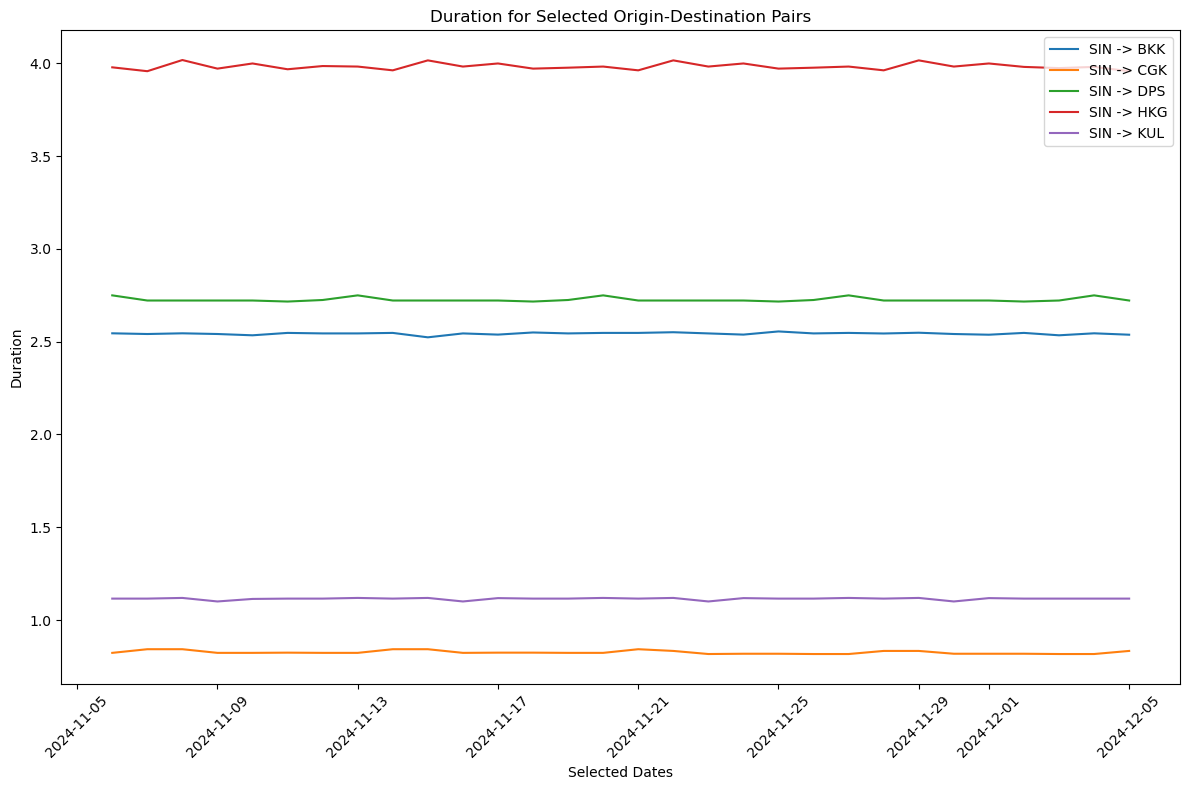

In [15]:
import matplotlib.pyplot as plt

# 创建一个新的图形和轴
fig, ax = plt.subplots(figsize=(12, 8))

# 绘制每个 Origin_Destination 的折线图
for origin_destination in daily_load_weight_sums['Origin_Destination'].unique():
    subset = daily_load_weight_sums[daily_load_weight_sums['Origin_Destination'] == origin_destination]
    ax.plot(subset['Selected Dates'], subset['Duration'], label=origin_destination)

# 设置标题和标签
ax.set_title('Duration for Selected Origin-Destination Pairs')
ax.set_xlabel('Selected Dates')
ax.set_ylabel('Duration')

# 旋转 x 轴标签以避免重叠
plt.xticks(rotation=45)

# 添加图例
ax.legend()

# 调整布局以为旋转的 x 轴标签腾出空间
plt.tight_layout()

# 显示图形
plt.show()

In [16]:
# Create a new figure and axis
# Combine 'Origin' and 'Destination' into one column
df_exploded['Origin_Destination'] = df_exploded.apply(lambda row: f"{row['Origin']} -> {row['Destination']}", axis=1)

# Drop the original 'Origin' and 'Destination' columns
#df_exploded = df_exploded.drop(columns=['Origin', 'Destination'])
df_exploded


,Carrier Code,Flight No,Origin,Destination,Validity From,Validity To,Mon,Tue,Wed,Thu,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Duration,Selected Dates,Origin_Destination
0,SQ,278,ADL,SIN,2024-11-06,2024-12-05,✓,✓,✓,✓,...,NaT,NaN,NaN,NaN,NaN,NaN,4.50,4.50,2024-11-06,ADL -> SIN
0,SQ,278,ADL,SIN,2024-11-06,2024-12-05,✓,✓,✓,✓,...,NaT,NaN,NaN,NaN,NaN,NaN,4.50,4.50,2024-11-07,ADL -> SIN
0,SQ,278,ADL,SIN,2024-11-06,2024-12-05,✓,✓,✓,✓,...,NaT,NaN,NaN,NaN,NaN,NaN,4.50,4.50,2024-11-08,ADL -> SIN
0,SQ,278,ADL,SIN,2024-11-06,2024-12-05,✓,✓,✓,✓,...,NaT,NaN,NaN,NaN,NaN,NaN,4.50,4.50,2024-11-09,ADL -> SIN
0,SQ,278,ADL,SIN,2024-11-06,2024-12-05,✓,✓,✓,✓,...,NaT,NaN,NaN,NaN,NaN,NaN,4.50,4.50,2024-11-10,ADL -> SIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,TR,201,YIA,SIN,2024-11-06,2024-12-05,✓,✓,✓,✓,...,NaT,NaN,NaN,NaN,NaN,NaN,3.25,3.25,2024-12-01,YIA -> SIN
1088,TR,201,YIA,SIN,2024-11-06,2024-12-05,✓,✓,✓,✓,...,NaT,NaN,NaN,NaN,NaN,NaN,3.25,3.25,2024-12-02,YIA -> SIN
1088,TR,201,YIA,SIN,2024-11-06,2024-12-05,✓,✓,✓,✓,...,NaT,NaN,NaN,NaN,NaN,NaN,3.25,3.25,2024-12-03,YIA -> SIN
1088,TR,201,YIA,SIN,2024-11-06,2024-12-05,✓,✓,✓,✓,...,NaT,NaN,NaN,NaN,NaN,NaN,3.25,3.25,2024-12-04,YIA -> SIN


In [17]:

# Define the selected (origin, destination) pairs
selected_pairs = [('SIN', 'BKK'), ('SIN', 'KUL'), ('SIN', 'CGK'), ('SIN', 'HKG'), ('SIN', 'DPS')]

# Filter the dataframe for the selected pairs
filtered_df = df_exploded[df_exploded[['Origin', 'Destination']].apply(tuple, axis=1).isin(selected_pairs)]

# Group by (origin, destination) pairs and sum the load weight
load_weight_sums = filtered_df.groupby(['Origin', 'Destination'])['Load Weight'].sum().reset_index()

# Group by (origin, destination) pairs and 'Selected Dates', then sum the load weight
daily_load_weight_sums = filtered_df.groupby(['Origin', 'Destination', 'Selected Dates'])['Load Weight'].sum().reset_index()

# Filter for the selected pairs
daily_load_weight_sums = daily_load_weight_sums[daily_load_weight_sums[['Origin', 'Destination']].apply(tuple, axis=1).isin(selected_pairs)]

# Display the result
daily_load_weight_sums

,Origin,Destination,Selected Dates,Load Weight
0,SIN,BKK,2024-11-06,574
1,SIN,BKK,2024-11-07,592
2,SIN,BKK,2024-11-08,668
3,SIN,BKK,2024-11-09,639
4,SIN,BKK,2024-11-10,545
...,...,...,...,...
145,SIN,KUL,2024-12-01,357
146,SIN,KUL,2024-12-02,469
147,SIN,KUL,2024-12-03,422
148,SIN,KUL,2024-12-04,422


In [18]:
# Combine 'Origin' and 'Destination' into one column
daily_load_weight_sums['Origin_Destination'] = daily_load_weight_sums.apply(lambda row: f"{row['Origin']} -> {row['Destination']}", axis=1)

# Drop the original 'Origin' and 'Destination' columns
daily_load_weight_sums = daily_load_weight_sums.drop(columns=['Origin', 'Destination'])

# Display the result
daily_load_weight_sums

,Selected Dates,Load Weight,Origin_Destination
0,2024-11-06,574,SIN -> BKK
1,2024-11-07,592,SIN -> BKK
2,2024-11-08,668,SIN -> BKK
3,2024-11-09,639,SIN -> BKK
4,2024-11-10,545,SIN -> BKK
...,...,...,...
145,2024-12-01,357,SIN -> KUL
146,2024-12-02,469,SIN -> KUL
147,2024-12-03,422,SIN -> KUL
148,2024-12-04,422,SIN -> KUL


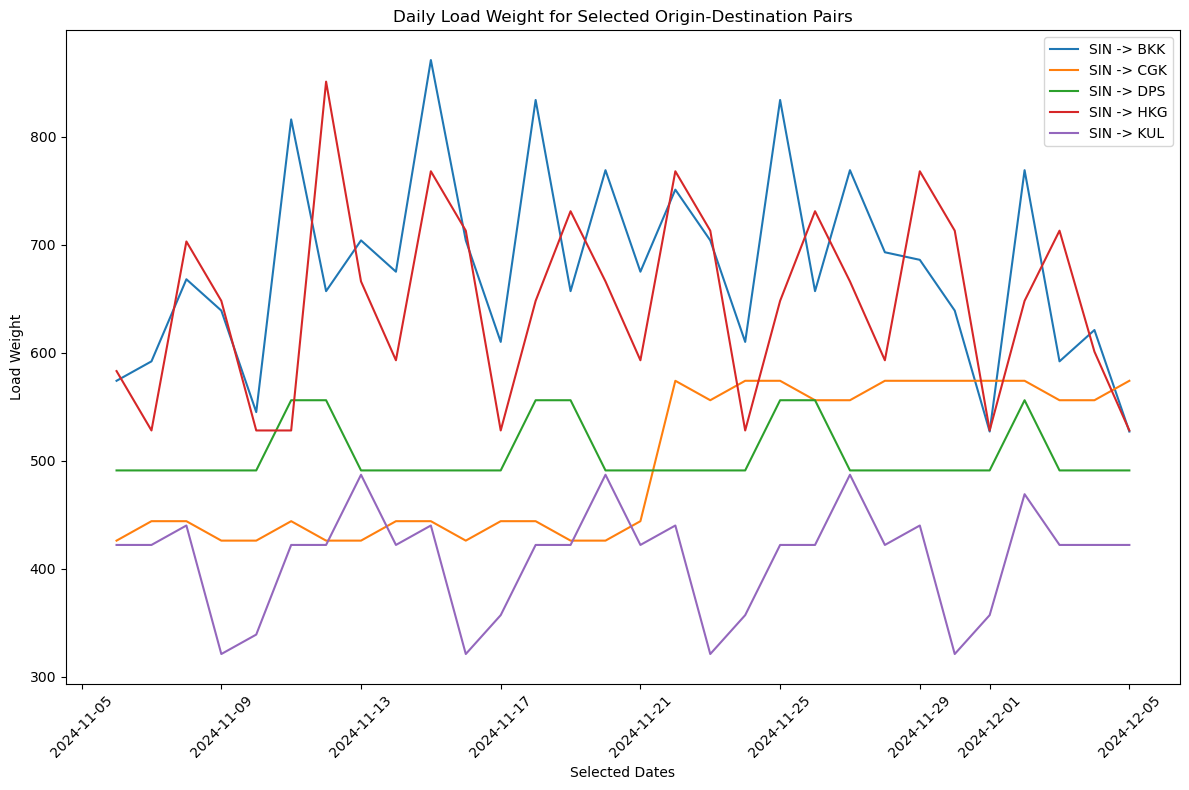

In [19]:
import matplotlib.pyplot as plt

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each Origin_Destination pair
for origin_destination in daily_load_weight_sums['Origin_Destination'].unique():
    subset = daily_load_weight_sums[daily_load_weight_sums['Origin_Destination'] == origin_destination]
    ax.plot(subset['Selected Dates'], subset['Load Weight'], label=origin_destination)

# Set the title and labels
ax.set_title('Daily Load Weight for Selected Origin-Destination Pairs')
ax.set_xlabel('Selected Dates')
ax.set_ylabel('Load Weight')

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45)

# Add a legend
ax.legend()

# Adjust layout to make room for rotated x-axis labels
plt.tight_layout()

# Convert x-axis week as the column Week
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.show()

In [20]:
# Group by 'Week', 'Origin', and 'Destination' and count the occurrences
weekly_origin_destination_counts = df_exploded.groupby(['Origin', 'Destination','Selected Dates']).size().reset_index(name='Counts')

# Display the result
weekly_origin_destination_counts.sort_values(by='Counts', ascending=False)
weekly_origin_destination_counts

,Origin,Destination,Selected Dates,Counts
0,ADL,SIN,2024-11-06,2
1,ADL,SIN,2024-11-07,1
2,ADL,SIN,2024-11-08,2
3,ADL,SIN,2024-11-09,1
4,ADL,SIN,2024-11-10,2
...,...,...,...,...
6894,ZRH,SIN,2024-12-01,1
6895,ZRH,SIN,2024-12-02,1
6896,ZRH,SIN,2024-12-03,1
6897,ZRH,SIN,2024-12-04,1


In [21]:
# SIN <-> BKK, SIN <-> KUL, SIN<->CGK, SIN<->HKG, SIN <-> DPS
# 计算每种 (Origin, Destination) 对组合的个数
origin_destination_counts = df_exploded.groupby(['Origin', 'Destination']).size().reset_index(name='Counts')

# 展示结果
origin_destination_counts.sort_values(by='Counts', ascending=False).head()

,Origin,Destination,Counts
169,SIN,BKK,387
105,KUL,SIN,383
230,SIN,KUL,380
22,BKK,SIN,373
36,CGK,SIN,285


In [22]:
# 筛选特定的(Origin, Destination)组合
filtered_combinations = [('SIN', 'BKK'), ('SIN', 'KUL'), ('SIN', 'CGK'), ('SIN', 'HKG'), ('SIN', 'DPS')]
filtered_weekly_counts = weekly_origin_destination_counts[
    weekly_origin_destination_counts[['Origin', 'Destination']].apply(tuple, axis=1).isin(filtered_combinations)
]

# 展示结果

filtered_weekly_counts[filtered_weekly_counts['Destination'] == 'DPS']

,Origin,Destination,Selected Dates,Counts
4290,SIN,DPS,2024-11-06,9
4291,SIN,DPS,2024-11-07,9
4292,SIN,DPS,2024-11-08,9
4293,SIN,DPS,2024-11-09,9
4294,SIN,DPS,2024-11-10,9
4295,SIN,DPS,2024-11-11,10
4296,SIN,DPS,2024-11-12,10
4297,SIN,DPS,2024-11-13,9
4298,SIN,DPS,2024-11-14,9
4299,SIN,DPS,2024-11-15,9


In [23]:
# 合并 'Origin' 和 'Destination' 列为一列
filtered_weekly_counts = filtered_weekly_counts.assign(Origin_Destination=filtered_weekly_counts.apply(lambda row: f"{row['Origin']} -> {row['Destination']}", axis=1))

# 展示结果
filtered_weekly_counts[['Selected Dates', 'Origin_Destination', 'Counts']]
filtered_weekly_counts

,Origin,Destination,Selected Dates,Counts,Origin_Destination
3505,SIN,BKK,2024-11-06,11,SIN -> BKK
3506,SIN,BKK,2024-11-07,12,SIN -> BKK
3507,SIN,BKK,2024-11-08,11,SIN -> BKK
3508,SIN,BKK,2024-11-09,12,SIN -> BKK
3509,SIN,BKK,2024-11-10,12,SIN -> BKK
...,...,...,...,...,...
5059,SIN,KUL,2024-12-01,12,SIN -> KUL
5060,SIN,KUL,2024-12-02,13,SIN -> KUL
5061,SIN,KUL,2024-12-03,13,SIN -> KUL
5062,SIN,KUL,2024-12-04,13,SIN -> KUL


In [24]:
filtered_weekly_counts = filtered_weekly_counts.drop(columns=['Origin', 'Destination'])

# 展示结果
filtered_weekly_counts

,Selected Dates,Counts,Origin_Destination
3505,2024-11-06,11,SIN -> BKK
3506,2024-11-07,12,SIN -> BKK
3507,2024-11-08,11,SIN -> BKK
3508,2024-11-09,12,SIN -> BKK
3509,2024-11-10,12,SIN -> BKK
...,...,...,...
5059,2024-12-01,12,SIN -> KUL
5060,2024-12-02,13,SIN -> KUL
5061,2024-12-03,13,SIN -> KUL
5062,2024-12-04,13,SIN -> KUL


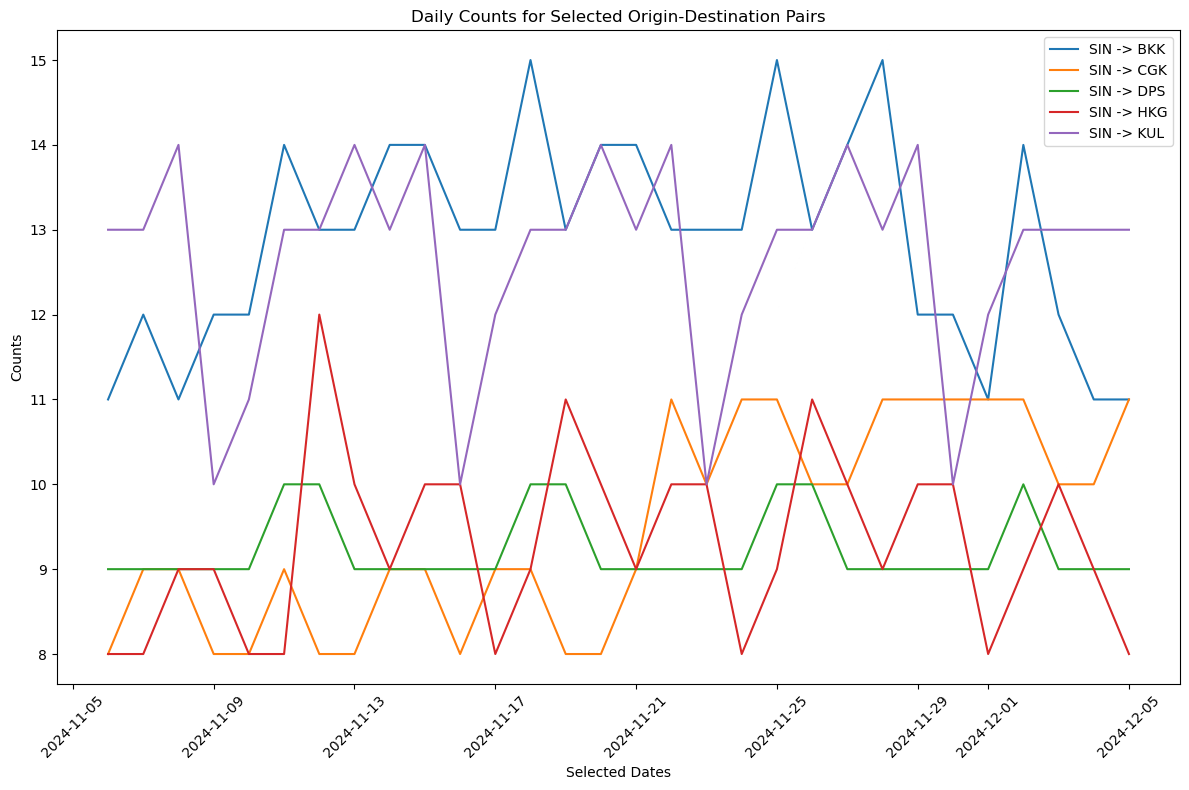

In [25]:
import matplotlib.pyplot as plt

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each Origin_Destination pair
for origin_destination in filtered_weekly_counts['Origin_Destination'].unique():
    subset = filtered_weekly_counts[filtered_weekly_counts['Origin_Destination'] == origin_destination]
    ax.plot(subset['Selected Dates'], subset['Counts'], label=origin_destination)

# Set the title and labels
ax.set_title('Daily Counts for Selected Origin-Destination Pairs')
ax.set_xlabel('Selected Dates')
ax.set_ylabel('Counts')

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45)

# Add a legend
ax.legend()

# Adjust layout to make room for rotated x-axis labels
plt.tight_layout()

# Convert x-axis week as the column Week
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.show()